In [11]:
import matplotlib.pyplot as plt
import numpy as np

original_img = plt.imread('bird_small.png')

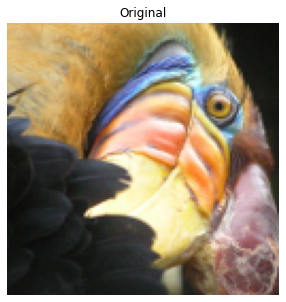

In [12]:
# 원래 이미지
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(original_img)
ax.set_title('Original')
ax.set_axis_off()

In [13]:
original_img * 255  # 각 픽셀의 [Red, Green, Blue] 값을 나타냄

array([[[219., 180., 103.],
        [230., 185., 116.],
        [226., 186., 110.],
        ...,
        [ 14.,  15.,  13.],
        [ 13.,  15.,  12.],
        [ 12.,  14.,  12.]],

       [[230., 193., 119.],
        [224., 192., 120.],
        [226., 192., 124.],
        ...,
        [ 16.,  16.,  13.],
        [ 14.,  15.,  10.],
        [ 11.,  14.,   9.]],

       [[228., 191., 123.],
        [228., 191., 121.],
        [220., 185., 118.],
        ...,
        [ 14.,  16.,  13.],
        [ 13.,  13.,  11.],
        [ 11.,  15.,  10.]],

       ...,

       [[ 15.,  18.,  16.],
        [ 18.,  21.,  18.],
        [ 18.,  19.,  16.],
        ...,
        [ 81.,  45.,  45.],
        [ 70.,  43.,  35.],
        [ 72.,  51.,  43.]],

       [[ 16.,  17.,  17.],
        [ 17.,  18.,  19.],
        [ 20.,  19.,  20.],
        ...,
        [ 80.,  38.,  40.],
        [ 68.,  39.,  40.],
        [ 59.,  43.,  42.]],

       [[ 15.,  19.,  19.],
        [ 20.,  20.,  18.],
        [ 18.,  

In [14]:
# 위 이미지에서 K개의 대표 색으로 압축(색변환)할 예정임

In [15]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [16]:

def 최근접_중심점_찾기(X, centroids):
    """
    데이터셋 X의 각 요소에 대한 클러스터 지정하는 함수

    입력인자:
        X (ndarray): (m개의 행, n개의 칼럼) 형태의 데이터셋
        centroids (ndarray): k개의 클러스터 중심점(만약 centroids == 3이라면 [0, 1, 2])

    반환값:
        idx: 데이터셋과 동일한 길이의 인덱스 배열(각 요소가 어느 클러스터에 포함되는지 나타냄)

    """

    # K값 설정(클러스터 갯수)
    K = centroids.shape[0]

    # 이 함수가 리턴할 인덱스 배열 정의
    idx = np.zeros(X.shape[0], dtype=int)  # 모든 요소 인덱스의 초깃값은 0으로(클러스터를 0으로 지정)

    for i in range(X.shape[0]):  # 모든 점(i)을 차례대로 순회하면서
          distance = []
          for j in range(K):  # 클러스터 갯수(j)만큼 돌면서
              norm_ij = np.linalg.norm(X[i] - centroids[j])  # 각 점(X_i)과 클러스터 중심점(centroids_j)간의 거리(norm) 계산
              distance.append(norm_ij)  # 각 점마다 모든 클러스터중심점과의 거리를 계산

          idx[i] = np.argmin(distance)  # distance 중 가장 작은 값(=가장 짧은 거리)의 인덱스(=클러스터번호)를 찾음

    return idx  # 데이터셋의 각 점들이 어느 클러스터중심점과 가장 가까운지 나타내는 배열(idx)을 리턴


def kMeans_시각화(X_, centroids_, previous_centroids_, idx_, K, i_):
    """
    kMeans 알고리즘 진행과정을 시각화하기 위한 헬퍼함수
    """

    # 각 점을 먼저 그리고
    plt.scatter(X_[:, 0], X_[:, 1], c=idx_)

    # 클러스터 중심점은 검정색 X로 그림
    plt.scatter(centroids_[:, 0], centroids_[:, 1], marker='x', c='k', linewidths=3)

    # 중심점 이동 이력을 선으로 그리기
    for j in range(centroids_.shape[0]):
        plt.plot([centroids_[j, :][0], previous_centroids_[j, :][0]],
                 [centroids_[j, :][1], previous_centroids_[j, :][1]],"-k", linewidth=1)

    plt.title(f"Iteration number {i_}")


def 중심점_계산(X, idx, K):
    """
    각 클러스터에 속한 모든 점들의 평균을 구해서
    새로운 중심점 좌표를 리턴하는 함수
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):  # 각 클러스터 인덱스별로
        points = X[idx == k]  # 클러스터에 속한 점들만 추려서 좌표를 구하고
        centroids[k] = np.mean(points, axis = 0)  # 해당 점들의 각 좌표축별로 평균값을 구함

    return centroids


def kMeans_init_centroids(X, K):
    """
    클러스터 중심점의 초깃값을
    각각 데이터셋 중 한 개의 점으로 랜덤하게 초기화해주는 함수
    """

    # 데이터셋을 랜덤하게 섞어서
    randidx = np.random.permutation(X.shape[0])

    # 랜덤배열 중 K개의 좌표를 각 클러스터 중심점으로 사용
    centroids = X[randidx[:K]]

    return centroids


def run_kMeans(X, initial_centroids, max_iters=10):
    """
    1. 데이터셋의 모든 점들에 대해 인덱스를 지정한 후,
    2. 동일한 인덱스의 점들의 중심점을 다시 찾고,
    3. 클러스터 중심점을 위에서 찾은 중심점으로 이동.
    4. 1~3의 과정을 max_iters 횟수만큼 반복
    """

    # 초깃값 설정
    m, n = X.shape  # m은 데이터셋 갯수, n은 점의 좌표축 갯수
    K = initial_centroids.shape[0]  # K는 클러스터 갯수
    centroids = initial_centroids  # 각 클러스터 중심점은 임의로 지정함
    previous_centroids = centroids
    idx = np.zeros(m)  # 각 점들의 소속 클러스터는 모두 0으로 시작함

    # K-Means 알고리즘 실행
    for i in range(max_iters):

        print(f"K-Means iteration {i}/{max_iters-1}")

        idx = 최근접_중심점_찾기(X, centroids)

        # 시각화하기
        kMeans_시각화(X, centroids, previous_centroids, idx, K, i)
        previous_centroids = centroids

        # 새롭게 지정된 클러스터별 중심점 재계산
        centroids = 중심점_계산(X, idx, K)
        plt.show()
    return centroids, idx

K-Means iteration 0/9


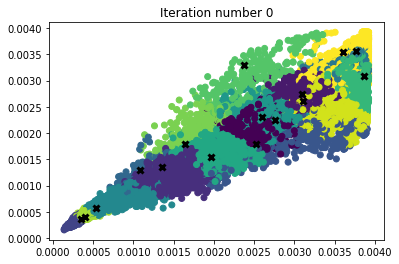

K-Means iteration 1/9


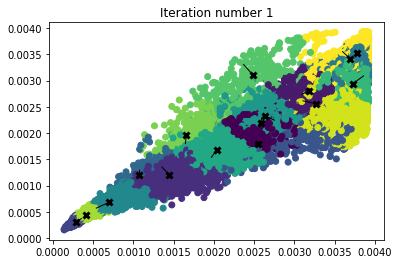

K-Means iteration 2/9


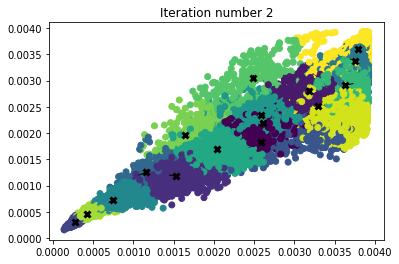

K-Means iteration 3/9


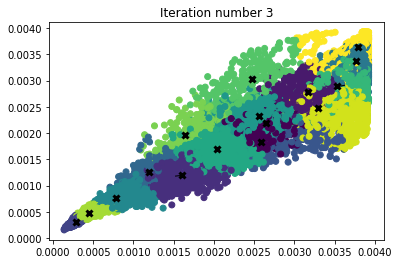

K-Means iteration 4/9


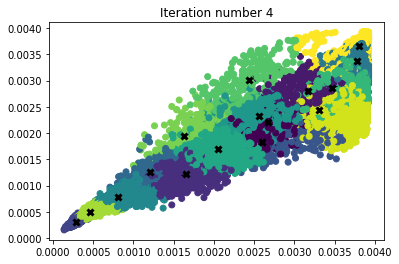

K-Means iteration 5/9


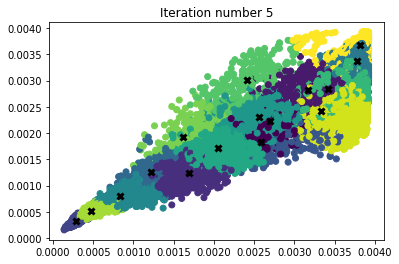

K-Means iteration 6/9


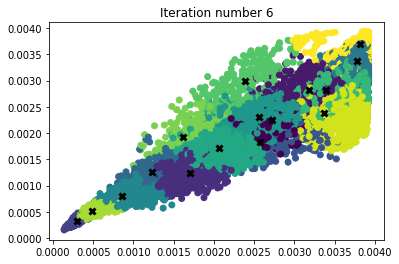

K-Means iteration 7/9


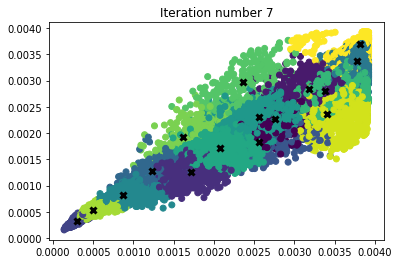

K-Means iteration 8/9


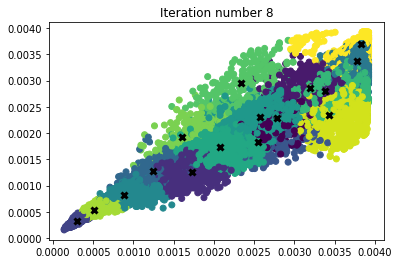

K-Means iteration 9/9


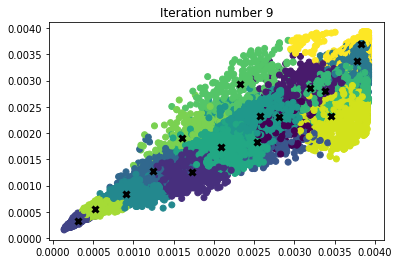

In [17]:
K = 16
max_iters = 10

# Using the function you have implemented above.
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this takes a couple of minutes
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

In [18]:
# Represent image in terms of indices
X_recovered = centroids[idx, :]

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape)

In [19]:
original_img = original_img * 255
# original_img = original_img.astype(int)
X_recovered = X_recovered * 255
# X_recovered = X_recovered.astype(int)

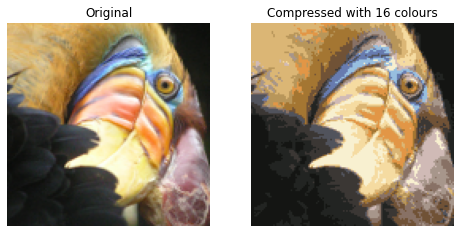

In [20]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

In [25]:
plt.savefig("asdf.png")

<Figure size 432x288 with 0 Axes>

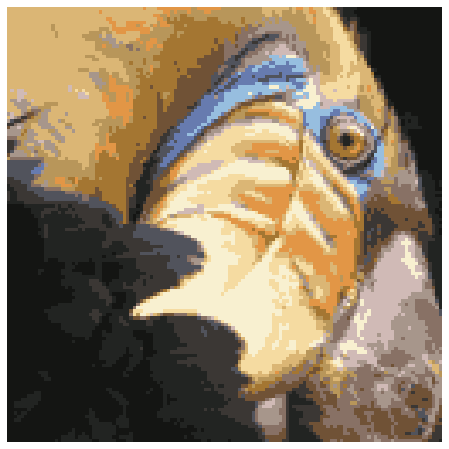

In [35]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(X_recovered)
plt.savefig("qwer.png")